Importing required libraries

In [1]:
import numpy as np
import pandas as pd

In [10]:
df = pd.read_csv('/content/Message_Data_Spam.csv',encoding = 'Latin-1')

In [11]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


# **Renaming of columns**

In [12]:
df.rename(columns = {'v1':'spam','v2':'message'},inplace = True)

In [13]:
df.head(1)

,spam,message
0,ham,"Go until jurong point, crazy.. Available only ..."


In [14]:
df.spam = pd.get_dummies(df.spam,columns = 'spam',drop_first = True)

In [15]:
df

,spam,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


# **Checking for null and Duplicate Values**

In [16]:
df.isnull().sum()

spam       0
message    0
dtype: int64

In [17]:
df.duplicated().sum()

403

In [18]:
df.drop_duplicates(inplace = True)

In [19]:
df.shape

(5169, 2)

# **Count of Words in each message**

In [20]:
df['len'] = df['message'].str.len()

In [21]:
df

,spam,message,len
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [22]:
df['word_count'] = df['message'].apply(lambda x: len(x.split()))

In [23]:
df

,spam,message,len,word_count
0,0,"Go until jurong point, crazy.. Available only ...",111,20
1,0,Ok lar... Joking wif u oni...,29,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28
3,0,U dun say so early hor... U c already then say...,49,11
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,30
5568,0,Will Ì_ b going to esplanade fr home?,37,8
5569,0,"Pity, * was in mood for that. So...any other s...",57,10
5570,0,The guy did some bitching but I acted like i'd...,125,26


In [24]:
df['message'] = df['message'].str.lower()

In [25]:
df.head(1)

,spam,message,len,word_count
0,0,"go until jurong point, crazy.. available only ...",111,20


# **Extract only Alphabets and Numbers using regex**

In [26]:
import re

In [27]:
df['message'] = df['message'].apply(lambda x:re.sub('[^a-z0-9\s]',"",x))

In [28]:
df.head()

,spam,message,len,word_count
0,0,go until jurong point crazy available only in ...,111,20
1,0,ok lar joking wif u oni,29,6
2,1,free entry in 2 a wkly comp to win fa cup fina...,155,28
3,0,u dun say so early hor u c already then say,49,11
4,0,nah i dont think he goes to usf he lives aroun...,61,13


# **Removing Stop words**

In [29]:
import nltk
from nltk.corpus import stopwords

In [30]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [31]:
stop = stopwords.words('english')
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [32]:
a = df['message'][0]
a

'go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat'

In [36]:
''.join([i for i in a if i not in stop])

'g unl jurng pn crz vlble nl n bug n gre wrl l e buffe cne here g re w'

In [38]:
df['message']=df['message'].apply(lambda x: ''.join([i for i in x if i not in stop]))
df.head()

,spam,message,len,word_count
0,0,g unl jurng pn crz vlble nl n bug n gre wrl l ...,111,20
1,0,k lr jkng wf u n,29,6
2,1,free enr n 2 wkl cp wn f cup fnl k 21 2005 ...,155,28
3,0,u un erl hr u c lre hen,49,11
4,0,nh n hnk he ge uf he lve run here hugh,61,13


In [39]:
df['spam'].rename('target',inplace = True)

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: target, Length: 5169, dtype: uint8

# **Remove Word stems using PorterStemmer**

In [40]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [41]:
ps.stem('played','playing')

'play'

In [42]:
df['message']=df['message'].apply(lambda x: ' '.join(ps.stem(i) for i in x.split()))

In [43]:
df.head()

,spam,message,len,word_count
0,0,g unl jurng pn crz vlble nl n bug n gre wrl l ...,111,20
1,0,k lr jkng wf u n,29,6
2,1,free enr n 2 wkl cp wn f cup fnl k 21 2005 ex ...,155,28
3,0,u un erl hr u c lre hen,49,11
4,0,nh n hnk he ge uf he lve run here hugh,61,13


# **Lemmatization of words**

In [44]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [45]:
lem = WordNetLemmatizer()

In [47]:
df['message']=df['message'].apply(lambda x: ' '.join([lem.lemmatize(i, pos ='v') for i in x.split()]))

In [48]:
df.head()

,spam,message,len,word_count
0,0,g unl jurng pn crz vlble nl n bug n gre wrl l ...,111,20
1,0,k lr jkng wf u n,29,6
2,1,free enr n 2 wkl cp wn f cup fnl k 21 2005 ex ...,155,28
3,0,u un erl hr u c lre hen,49,11
4,0,nh n hnk he ge uf he lve run here hugh,61,13


# **Count Vectorization**

In [49]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [50]:
x = df['message']
y = df['spam']

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.preprocessing import OrdinalEncoder

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x,y ,test_size= 0.3, random_state = 10)

In [54]:
x_train_cv = cv.fit_transform(x_train)
x_test_cv = cv.transform(x_test)

In [55]:
models = {'LogisticRegression' : LogisticRegression(random_state=10),
         'DecisionTreeClassifier' : DecisionTreeClassifier(random_state=101),
         'RandomForestClassifier' : RandomForestClassifier(random_state=1001)}

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

LogisticRegression
Accuracy Score:- 0.96
roc-auc score:- 0.8634192600605165
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1348
           1       0.98      0.73      0.84       203

    accuracy                           0.96      1551
   macro avg       0.97      0.86      0.91      1551
weighted avg       0.96      0.96      0.96      1551



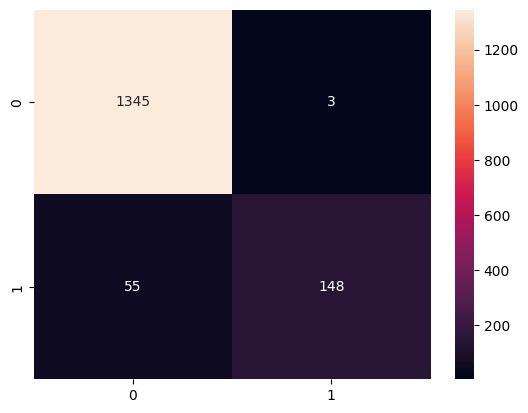

True Negative- 1345
False Positive- 1345
False Negative- 55
True Positive- 148
****************************************************************************************
DecisionTreeClassifier
Accuracy Score:- 0.95
roc-auc score:- 0.8353170542748973
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1348
           1       0.88      0.68      0.77       203

    accuracy                           0.95      1551
   macro avg       0.92      0.84      0.87      1551
weighted avg       0.94      0.95      0.94      1551



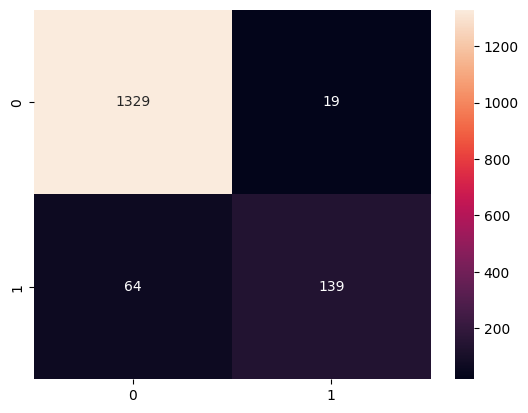

True Negative- 1329
False Positive- 1329
False Negative- 64
True Positive- 139
****************************************************************************************
RandomForestClassifier
Accuracy Score:- 0.95
roc-auc score:- 0.7906403940886699
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1348
           1       1.00      0.58      0.74       203

    accuracy                           0.95      1551
   macro avg       0.97      0.79      0.85      1551
weighted avg       0.95      0.95      0.94      1551



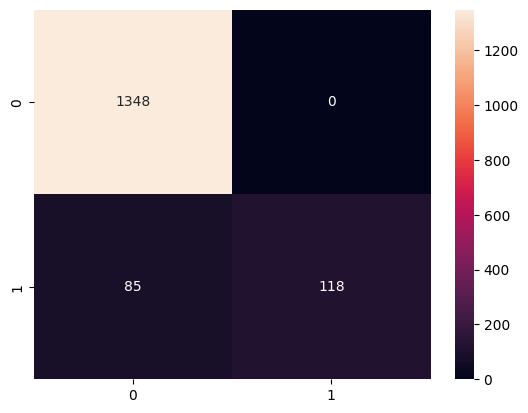

True Negative- 1348
False Positive- 1348
False Negative- 85
True Positive- 118
****************************************************************************************


In [61]:
for name, model in models.items():
    model.fit(x_train_cv, y_train)

    y_pred = model.predict(x_test_cv)

    print(name)
    print('Accuracy Score:-', round(metrics.accuracy_score(y_test, y_pred),2))
    print('roc-auc score:-', metrics.roc_auc_score(y_test, y_pred))
    print(metrics.classification_report(y_test, y_pred))
    sns.heatmap(metrics.confusion_matrix(y_test, y_pred),annot = True,fmt='g')
    plt.show()
    tn, fp, fn, tp=metrics.confusion_matrix(y_test, y_pred).ravel()
    print("True Negative-" , tn)
    print("False Positive-" , tn)
    print("False Negative-" , fn)
    print("True Positive-" , tp)
    print("****************************************************************************************")